<a href="https://colab.research.google.com/github/AbhishekA87/ML_Files/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
#Connect google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Machine Learning A-Z (Model Selection) (1)/Classification (1)/Data (1).csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

The dataset consists of various variables and the purpose is to chose the best classification model basis the percentage of confusion matrix, to identify the tumor

#Decision Tree Classification


In [ ]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Spliting the Dataset into train, test set


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, 1:-1], dataset.iloc[:, -1], test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Training the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#Predicting a test value
print(classifier.predict(sc.transform([[1,1,1,1,2,1,3,1,1]])))

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Creating a Confusion Matrix to check the model
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_dt = classifier.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
ac_dt = accuracy_score(y_test, y_pred_dt)
print(ac_dt)

[[104   3]
 [  4  60]]
0.9590643274853801


This model shows 95.9% accuracy which is pretty good


# K-Nearest Model

In [ ]:
#Using same dataset to create a KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_knn = classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
ac_knn = accuracy_score(y_test, y_pred_knn)
print(ac_knn)

[[103   4]
 [  5  59]]
0.9473684210526315


#Kernel SVM MOdel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ksvm = classifier.predict(X_test)
cm_ksvm = confusion_matrix(y_test, y_pred_ksvm)
print(cm_ksvm)
ac_ksvm = accuracy_score(y_test, y_pred_ksvm)
print(ac_ksvm)

[[101   6]
 [  3  61]]
0.9473684210526315


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#Confusion Matrix Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_lr = classifier.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
ac_lr= accuracy_score(y_test, y_pred_lr)
print(ac_lr)

[[103   4]
 [  5  59]]
0.9473684210526315


#Naive_Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_nb = classifier.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)
ac_nb= accuracy_score(y_test, y_pred_nb)
print(ac_nb)

[[99  8]
 [ 2 62]]
0.9415204678362573


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_rfc = classifier.predict(X_test)
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
print(cm_rfc)
ac_rfc = accuracy_score(y_test, y_pred_rfc)
print(ac_rfc)

[[104   3]
 [  5  59]]
0.9532163742690059


#Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_svm = classifier.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
ac_svm = accuracy_score(y_test, y_pred_svm)
print(ac_svm)

[[102   5]
 [  5  59]]
0.9415204678362573


#Visualizing and comparing the various models


                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Decision Tree        0.959064   0.959002  0.959064  0.958998
Random Forest        0.953216   0.953187  0.953216  0.953062
Kernel SVM           0.947368   0.948433  0.947368  0.947597
KNN                  0.947368   0.947268  0.947368  0.947284
Logistic Regression  0.947368   0.947268  0.947368  0.947284
Naive Bayes          0.941520   0.944836  0.941520  0.941986
SVM                  0.941520   0.941520  0.941520  0.941520


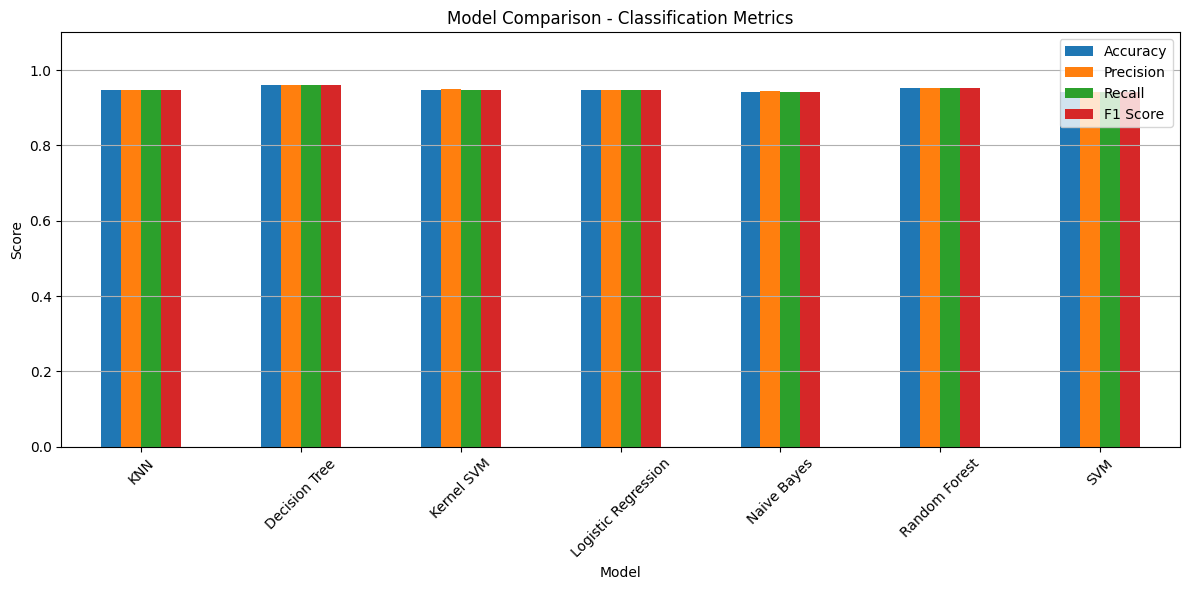

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Replace with your actual y_test
# y_test = ...

# Define model predictions and labels
models = {
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Kernel SVM": y_pred_ksvm,
    "Logistic Regression": y_pred_lr,
    "Naive Bayes": y_pred_nb,
    "Random Forest": y_pred_rfc,
    "SVM": y_pred_svm
}

# List to store results
results = []

# Loop through models and calculate metrics
for name, y_pred in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

# Create DataFrame from results
metrics_df = pd.DataFrame(results).set_index("Model")

# Print metrics table
print(metrics_df.sort_values(by="F1 Score", ascending=False))

# Visualize comparison
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison - Classification Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

